In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic_df = pd.read_csv('train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Some basic questions:

    1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Then we'll dig deeper, with a broader question:

    5.) What factors helped someone survive the sinking?

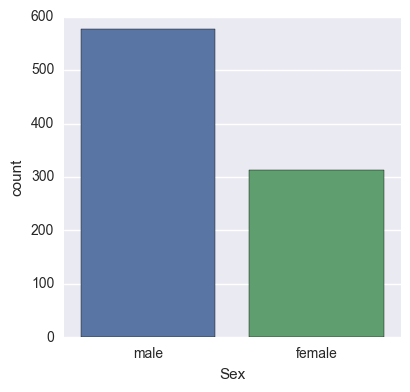

In [13]:
sns.factorplot('Sex', data= titanic_df, kind="count")

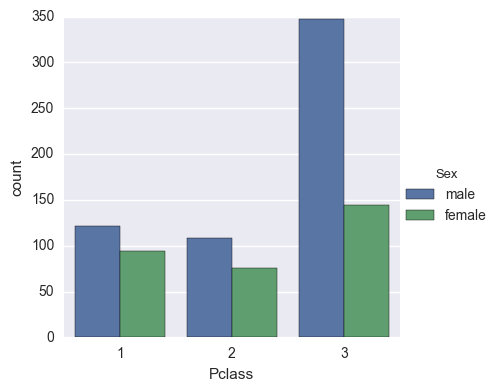

In [19]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

#notice the higher no of males in 3rd Class

In [26]:
titanic_df['Sex'].dtype()

TypeError: 'numpy.dtype' object is not callable

In [125]:
x = np.NaN

In [20]:
#function for identification of children/person
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16: #definition of child
        return 'child'
    else:
        return sex
    

    

In [159]:
def deck(cabin):
    if pd.isnull(cabin):
        return np.NaN
    else:
        return cabin[0]


In [22]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)


In [140]:
type(titanic_df.Cabin[2])

float

In [160]:
titanic_df['deck'] = titanic_df['Cabin'].apply(deck)

In [161]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,NaN


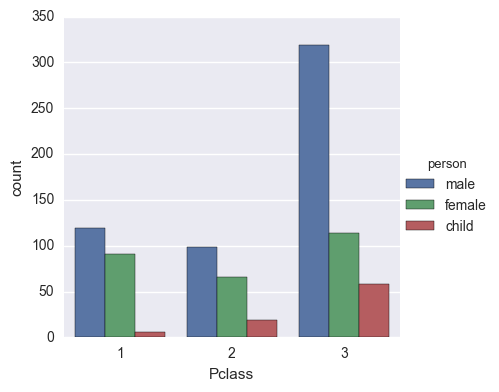

In [25]:
sns.factorplot('Pclass', data=titanic_df,kind ="count",  hue= 'person')

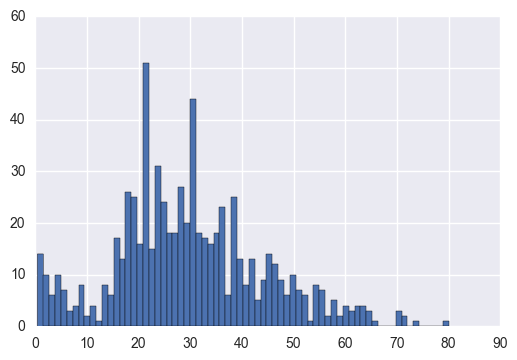

In [26]:
titanic_df['Age'].hist(bins=70)

In [27]:
titanic_df['Age'].mean()

29.69911764705882

In [28]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

C:\Users\Bharat Thakur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


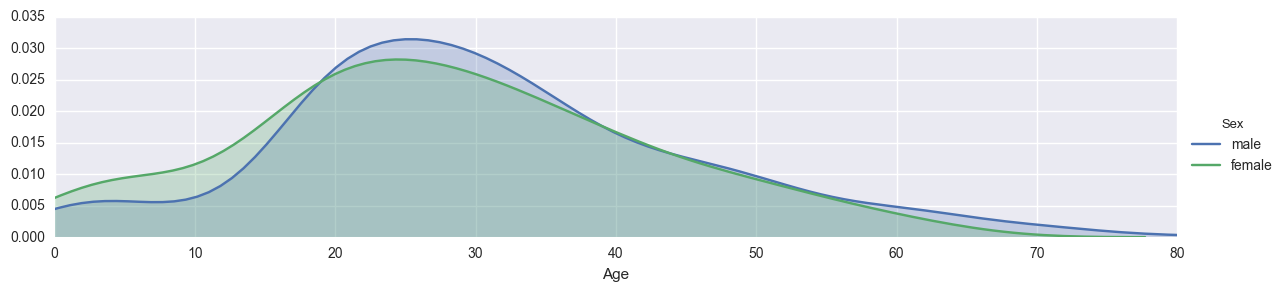

In [30]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))

fig.add_legend()

C:\Users\Bharat Thakur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


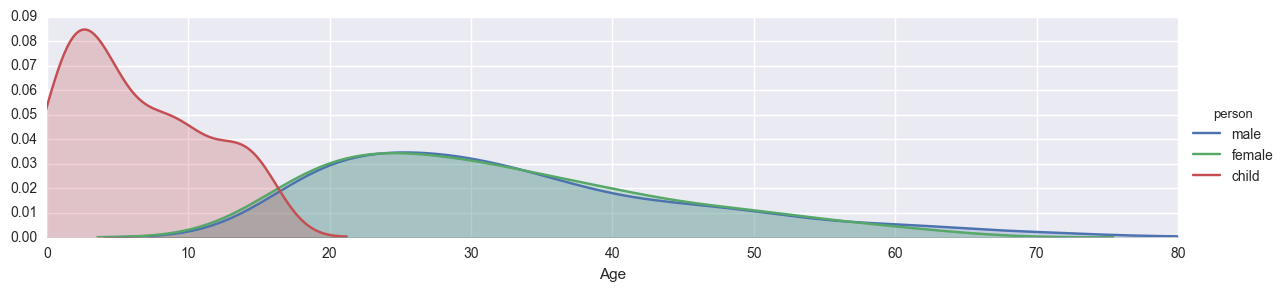

In [31]:
fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))

fig.add_legend()

C:\Users\Bharat Thakur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


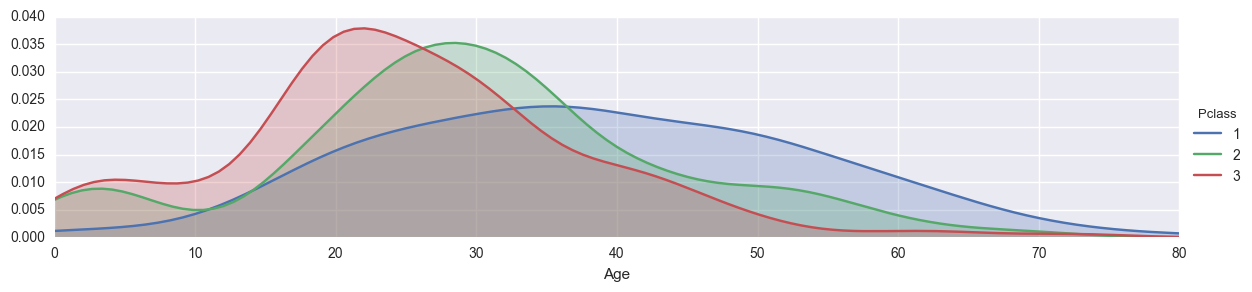

In [80]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))

fig.add_legend()

In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [34]:
deck = titanic_df['Cabin'].dropna()

In [35]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

(<seaborn.axisgrid.FacetGrid at 0x1798d1490f0>,)

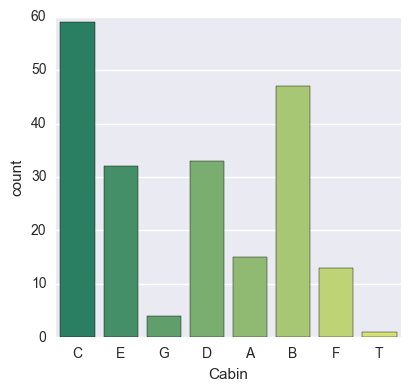

In [71]:
#extracting decklevel
deck = titanic_df['Cabin'].dropna()
levels = []
for level in deck:
    levels.append(level[0])
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin_df, palette = 'summer', kind = 'count'), #x_order = ['A','B',"C","D","E","F","G", "T"])

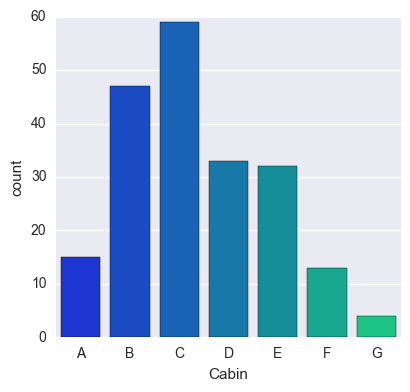

In [74]:
# Removing the T cabin
cabin_df = cabin_df[cabin_df != 'T']
sns.factorplot('Cabin', data = cabin_df, palette = 'winter', kind = 'count', order = ['A','B',"C","D","E","F","G"])

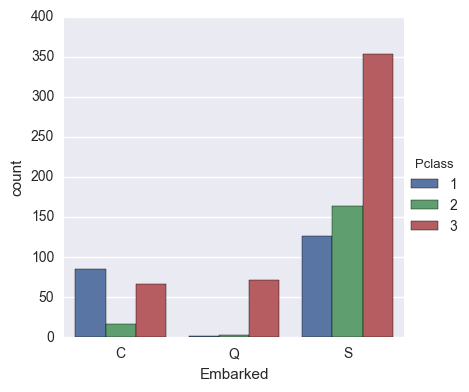

In [78]:
sns.factorplot('Embarked', data = titanic_df, hue = 'Pclass',kind = 'count', order = ['C', 'Q', "S"])

In [81]:
#who was alone and who was with family
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [82]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [87]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0 ] = 'Alone'

C:\Users\Bharat Thakur\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


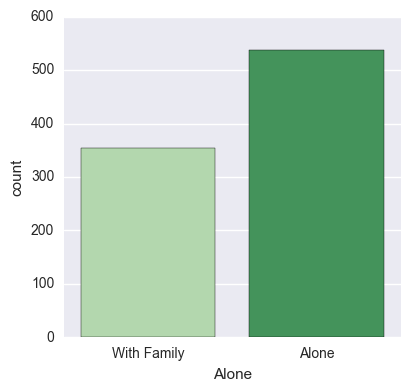

In [94]:
sns.factorplot('Alone', data = titanic_df, palette = 'Greens', kind = 'count')

In [95]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1: 'yes'})

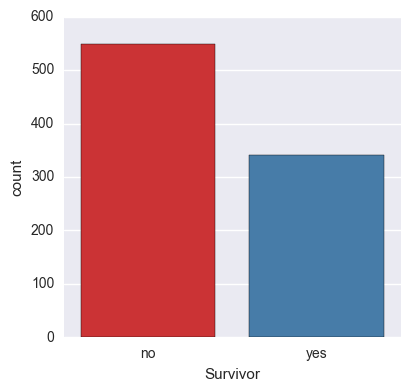

In [101]:
sns.factorplot('Survivor', data = titanic_df, palette = 'Set1', kind = 'count')

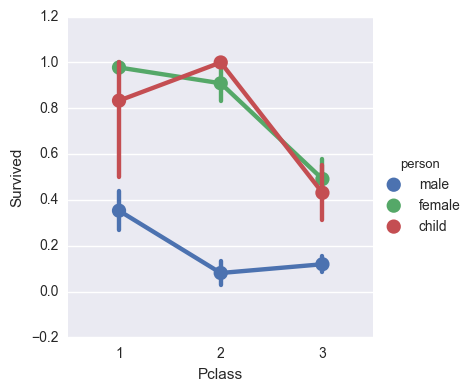

In [104]:
sns.factorplot('Pclass', 'Survived', hue = 'person' , data = titanic_df)

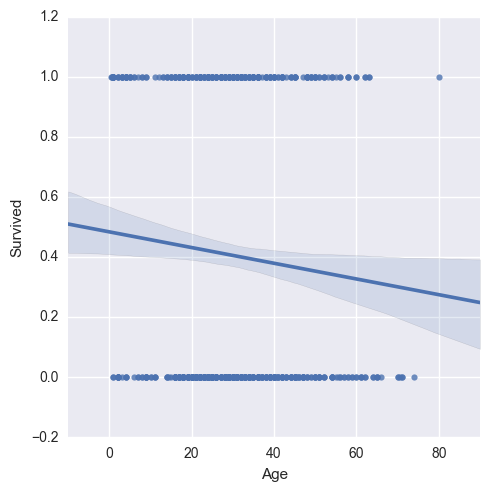

In [105]:
sns.lmplot('Age', 'Survived', data = titanic_df)

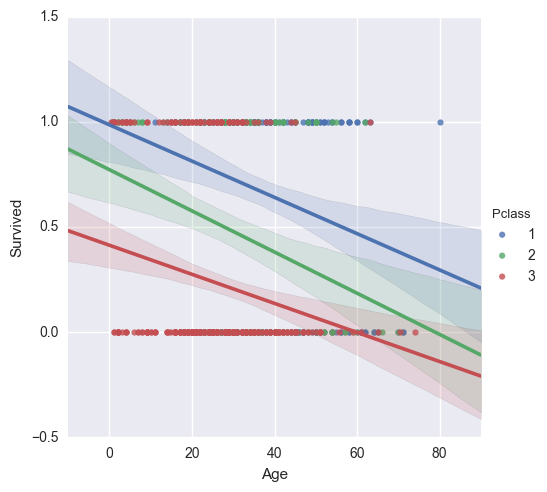

In [106]:
sns.lmplot('Age', 'Survived', data = titanic_df, hue = 'Pclass')

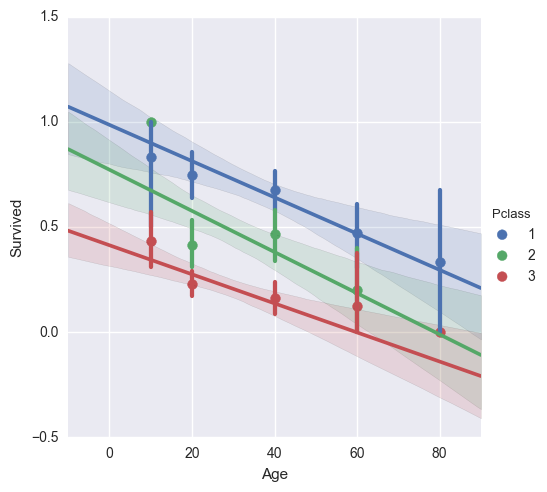

In [108]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived', hue = 'Pclass', data = titanic_df, x_bins = generations)

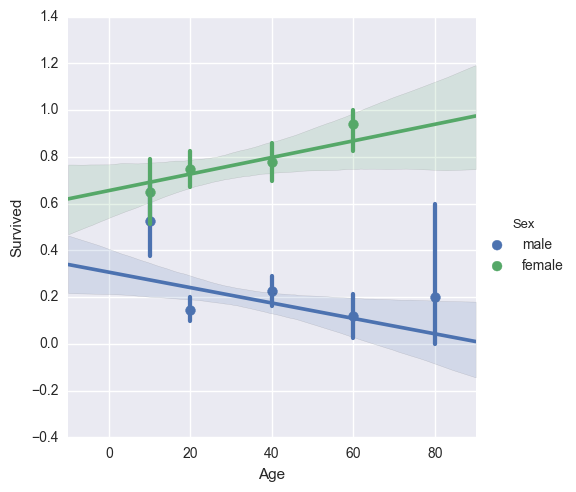

In [109]:
sns.lmplot('Age','Survived', hue = 'Sex', data = titanic_df, x_bins = generations)

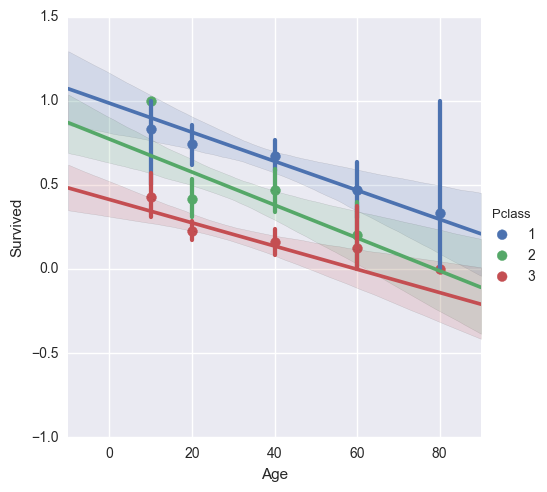

In [117]:
sns.lmplot('Age','Survived', hue = 'Pclass', data = titanic_df, x_bins = generations)

In [113]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


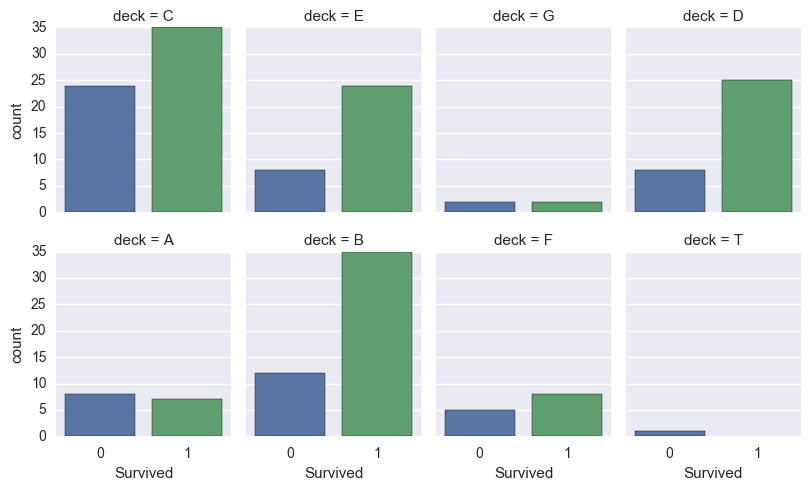

In [163]:
g = sns.factorplot("Survived", col="deck", col_wrap=4,
...                    data=titanic_df[titanic_df.deck.notnull()],
...                    kind="count", size=2.5, aspect=.8)

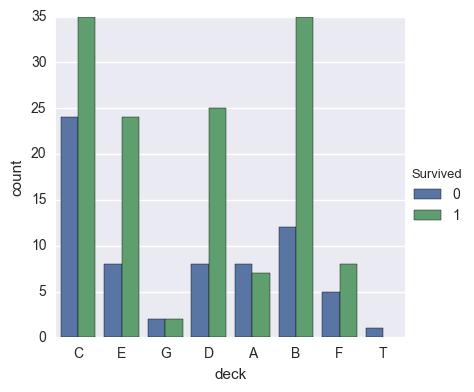

In [167]:
g = sns.factorplot("deck", hue = 'Survived',
...                    data=titanic_df[titanic_df.deck.notnull()],
...                    kind="count")